In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import WOEEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import resample




from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

sns.set_style('whitegrid') # sets the visual style of Seaborn plots to 'whitegrid', which displays a white background with grid lines.
sns.set_palette('pastel')  # sets the color palette to 'pastel', which is one of the predefined color palettes provided by Seaborn. It consists of a set of visually distinct colors suitable for plotting categorical data.

import warnings
# Ignore all warnings
warnings.simplefilter("ignore")

In [9]:
train_df = pd.read_csv('fraudTrain.csv', index_col='Unnamed: 0')
test_df = pd.read_csv('fraudTest.csv', index_col='Unnamed: 0')

In [10]:
train_df.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,01/01/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,01/01/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,01/01/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,19/01/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,01/01/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,12/01/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,01/01/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,28/03/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,01/01/2019 0:04,4.767270e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,40.3750,-75.2045,2158,Transport planner,19/06/1961,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,01/01/2019 0:04,3.007470e+13,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,37.9931,-100.9893,2691,Arboriculturist,16/08/1993,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,01/01/2019 0:05,6.011360e+15,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,38.8432,-78.6003,6018,"Designer, multimedia",21/08/1947,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,01/01/2019 0:05,4.922710e+15,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,40.3359,-79.6607,1472,Public affairs consultant,07/03/1941,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,01/01/2019 0:06,2.720830e+15,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,36.5220,-87.3490,151785,Pathologist,28/03/1974,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048575 non-null  float64
 5   first                  1048575 non-null  object 
 6   last                   1048575 non-null  object 
 7   gender                 1048575 non-null  object 
 8   street                 1048575 non-null  object 
 9   city                   1048575 non-null  object 
 10  state                  1048575 non-null  object 
 11  zip                    1048575 non-null  int64  
 12  lat                    1048575 non-null  float64
 13  long                   1048575 non-null  float64
 14  city_pop          

In [12]:
train_df.shape

(1048575, 22)

In [13]:
is_fraud = train_df["is_fraud"].value_counts()
print("Yes: ",is_fraud[1])
print("No: ",is_fraud[0])

Yes:  6006
No:  1042569


In [14]:
print('data imbalance')

data imbalance


In [15]:
print(train_df.isna().sum().sum())
print(train_df.duplicated().sum())

0
0


In [16]:
print('No Null and duplicate Value only data imbalance')

No Null and duplicate Value only data imbalance


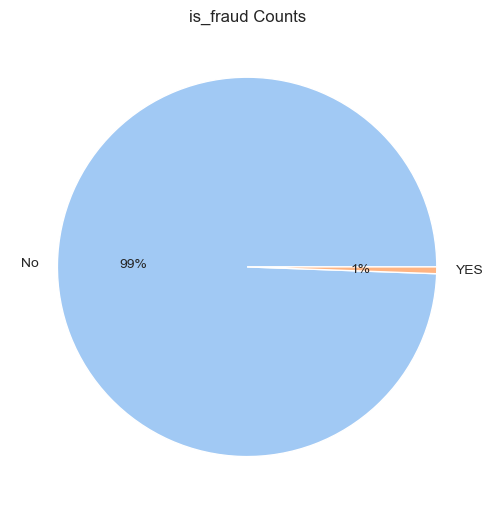

In [17]:
is_fraud = train_df["is_fraud"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(is_fraud, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [22]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])

In [24]:
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
test_df['hour'] = test_df['trans_date_trans_time'].dt.hour

train_df['month'] = train_df['trans_date_trans_time'].dt.month
test_df['month'] = test_df['trans_date_trans_time'].dt.month

train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,2019-01-01 00:00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,2019-01-01 00:00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2019-01-01 00:00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,19/01/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1
3,2019-01-01 00:01:00,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,12/01/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1
4,2019-01-01 00:03:00,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,28/03/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1


In [25]:
# remove non-useful columns
columns_to_drop = ['first', 'unix_time', 'dob', 'cc_num', 'zip', 'city','street', 'state', 'trans_num', 'trans_date_trans_time']
train_df = train_df.drop(columns_to_drop, axis=1)
test_df = test_df.drop(columns_to_drop, axis=1)
train_df.head()

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1


In [26]:
train_df.head()

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1
2,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0,1
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,0,1
4,fraud_Keeling-Crist,misc_pos,41.96,Garcia,M,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,0,1


In [27]:
train_df['merchant'] = train_df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [28]:
train_df.describe(include='object')

,merchant,category,last,gender,job
count,1048575,1048575,1048575,1048575,1048575
unique,693,14,479,2,493
top,Kilback LLC,gas_transport,Smith,F,Film/video editor
freq,3521,106430,23394,573968,7940


In [29]:
# applying label encoding
train_df['gender'] = train_df['gender'].map({'F': 0, 'M': 1})

# applying WOE encoding
for col in ['job','merchant', 'category', 'lat', 'last']:
    train_df[col] = WOEEncoder().fit_transform(train_df[col],train_df['is_fraud'])

In [30]:
train_df.head(10)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,1.117208,0.940474,4.97,-2.256411,0,36.0788,-81.1781,3495,-0.867094,36.011293,-82.048315,0,0,1
1,0.741033,0.900512,107.23,-0.465657,0,48.8878,-118.2105,149,-0.680162,49.159047,-118.186462,0,0,1
2,-0.556059,-0.853714,220.11,0.212214,1,42.1808,-112.2620,4154,-0.832608,43.150704,-112.154481,0,0,1
3,-0.182626,-0.201603,45.00,0.373386,1,46.2306,-112.1138,1939,0.592501,47.034331,-112.561071,0,0,1
4,-0.193924,-0.641947,41.96,0.291657,1,38.4207,-79.4629,99,-2.250965,38.674999,-78.632459,0,0,1
5,-0.152364,-0.201603,94.63,1.124327,0,40.3750,-75.2045,2158,-0.202000,40.653382,-76.152667,0,0,1
6,-0.366440,-0.642193,44.54,0.248902,0,37.9931,-100.9893,2691,0.509561,37.162705,-100.153370,0,0,1
7,-0.037067,-0.201603,71.65,-0.349981,1,38.8432,-78.6003,6018,1.291298,38.948089,-78.540296,0,0,1
8,-1.351671,-0.641947,4.27,1.049270,0,40.3359,-79.6607,1472,0.862165,40.351813,-79.958146,0,0,1
9,0.822588,0.900512,198.39,1.184422,0,36.5220,-87.3490,151785,0.844944,37.179198,-87.485381,0,0,1


In [34]:
X = train_df.drop("is_fraud", axis=1)
y = train_df["is_fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

In [35]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_test)
print(classification_report(y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    208520
           1       0.00      0.00      0.00      1195

    accuracy                           0.99    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       0.99      0.99      0.99    209715

Logistic Regression accuracy is: 99.38%


In [40]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
predict = svm_model.predict(X_test)

print(classification_report(y_test, predict))
svm_accuracy = accuracy_score(predict,y_test)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    208520
           1       0.01      0.11      0.02      1195

    accuracy                           0.94    209715
   macro avg       0.50      0.53      0.50    209715
weighted avg       0.99      0.94      0.96    209715

SVC model accuracy is: 94.23%


In [38]:
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(X_train, y_train)
predict_ID3 = DT.predict(X_test)
print(classification_report(y_test, predict_ID3))
ID3_accuracy = accuracy_score(predict_ID3,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(ID3_accuracy*100))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    208520
           1       0.00      0.00      0.00      1195

    accuracy                           0.99    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       0.99      0.99      0.99    209715

ID3 model accuracy is: 99.43%


In [39]:
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train, y_train)

predict_RF = RF.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208520
           1       0.95      0.71      0.81      1195

    accuracy                           1.00    209715
   macro avg       0.97      0.86      0.91    209715
weighted avg       1.00      1.00      1.00    209715

Random Forest model accuracy is: 99.81%


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
pred_knn = knn.predict(X_test)

# Evaluation
print(classification_report(y_test, pred_knn))
knn_accuracy = accuracy_score(pred_knn, y_test)
print('knn model accuracy is: {:.2f}%'.format(knn_accuracy * 100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208520
           1       0.57      0.36      0.44      1195

    accuracy                           0.99    209715
   macro avg       0.78      0.68      0.72    209715
weighted avg       0.99      0.99      0.99    209715

knn model accuracy is: 99.48%


In [44]:
Algorithms = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'Knn']
accuracy = [LR_accuracy, svm_accuracy, ID3_accuracy, RF_accuracy, knn_accuracy]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,Logistic Regression,0.993830
1,SVC,0.942255
2,Decision Tree,0.994302
3,Random Forest,0.998131
4,Knn,0.994774


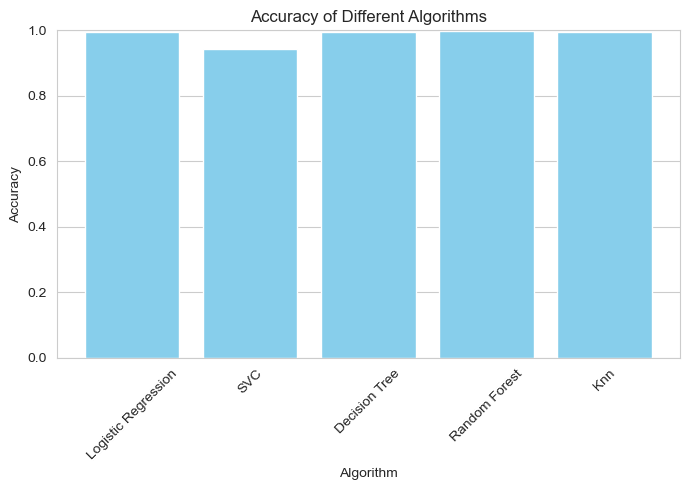

In [45]:
plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()